# Часть 1: K-Means
## Кластеризация исполнителей по жанрам

В этом задании вы попробуете кластеризовать исполнителей по жанрам на основе данных о прослушивании.

В матрице sample_matrix по строкам стоят пользователи, а по столбцам - исполнители.

Для каждой пары (пользователь,исполнитель) в таблице стоит число - доля (процент) прослушивания этого исполнителя выбранным пользователем.

## Импорт библиотек, загрузка данных

In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 23.2.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

In [3]:
ratings = pd.read_excel("https://github.com/evgpat/edu_stepik_rec_sys/blob/main/datasets/sample_matrix.xlsx?raw=true",
                        engine='openpyxl')

In [5]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Задание

Транспонируем матрицу ratings, чтобы по строкам стояли исполнители.

In [6]:
ratings = ratings.T

Выкиньте строку под названием `user`.

In [7]:
ratings.drop("user", inplace=True)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.034590,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
modest mouse,NaN,NaN,NaN,NaN,0.015935,NaN,NaN,NaN,NaN,0.030437,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Вопрос для Quiz

Сколько строк осталось в матрице ratings?

Заполните пропуски нулями.

In [8]:
ratings.shape

(1000, 5000)

In [9]:
ratings.fillna(0, inplace=True)
ratings.isna().sum()

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64

Нормализуйте данные при помощи `normalize`.

In [10]:
from sklearn.preprocessing import normalize

ratings_norm = normalize(ratings, axis=1)

Примените KMeans с 5ю кластерами на преобразованной матрице (сделайте fit, а затем вычислите кластеры при помощи predict).

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(ratings_norm)
kmeans.predict(ratings_norm)

array([4, 3, 2, 2, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 2, 3, 3, 2, 4, 4,
       3, 4, 3, 3, 3, 3, 3, 3, 2, 0, 2, 1, 4, 4, 4, 4, 3, 2, 3, 3, 1, 0,
       4, 3, 4, 2, 3, 2, 4, 3, 4, 2, 4, 3, 2, 4, 2, 3, 3, 3, 4, 3, 3, 2,
       3, 3, 2, 1, 3, 2, 3, 4, 3, 4, 3, 3, 4, 3, 1, 3, 3, 1, 4, 2, 4, 2,
       4, 3, 3, 2, 3, 4, 3, 3, 1, 1, 4, 3, 3, 4, 4, 4, 1, 4, 4, 0, 2, 3,
       4, 2, 1, 1, 4, 4, 2, 2, 3, 4, 3, 2, 0, 3, 3, 1, 3, 4, 4, 4, 1, 3,
       3, 4, 2, 4, 4, 4, 2, 1, 2, 1, 3, 0, 4, 3, 0, 3, 3, 2, 4, 4, 1, 4,
       4, 4, 3, 0, 3, 1, 4, 4, 3, 1, 2, 4, 0, 4, 2, 1, 4, 3, 4, 4, 1, 4,
       2, 3, 3, 3, 2, 4, 1, 3, 0, 4, 4, 1, 0, 4, 4, 4, 4, 1, 4, 0, 3, 1,
       1, 3, 3, 3, 3, 2, 1, 1, 2, 4, 2, 1, 1, 4, 4, 2, 4, 1, 4, 4, 2, 0,
       3, 4, 0, 3, 3, 2, 4, 4, 1, 3, 4, 1, 2, 3, 3, 4, 1, 3, 1, 4, 3, 4,
       1, 3, 4, 3, 1, 3, 3, 3, 2, 1, 1, 1, 1, 1, 2, 3, 3, 3, 1, 4, 4, 1,
       2, 2, 4, 4, 0, 0, 4, 2, 1, 3, 4, 3, 4, 1, 0, 0, 2, 2, 4, 2, 4, 3,
       2, 4, 4, 2, 0, 4, 4, 4, 3, 3, 2, 4, 4, 3, 3,

Выведите на экран центры кластеров (центроиды)

In [12]:
# ваш код здесь

centroids = kmeans.cluster_centers_
centroids

array([[ 3.25642726e-04,  2.95137716e-04,  1.89719638e-03, ...,
         4.44095361e-05,  1.05713919e-02,  8.77802992e-04],
       [ 2.87933372e-03,  8.67361738e-19,  3.47403067e-04, ...,
         4.89301460e-04,  2.16840434e-19,  4.77644471e-04],
       [ 5.48085476e-04,  1.03378186e-03,  1.83636507e-03, ...,
         1.08160283e-02,  0.00000000e+00,  2.27064600e-03],
       [ 1.54228898e-03,  2.49872601e-03,  2.85062188e-03, ...,
        -1.51788304e-18,  1.66478386e-03,  4.83523817e-03],
       [ 1.41476431e-03,  1.22379333e-03,  9.11459660e-04, ...,
         4.30055391e-04,  1.02928545e-03,  7.98105057e-04]])

In [13]:
import numpy as np

np.argsort(centroids, axis=1)[:, -10:]

array([[3652, 4234, 1697,  754,  683, 2128,  610, 1141, 1489, 4183],
       [1061, 1588, 4870, 2636, 3994, 1311, 1738, 1837, 1258, 1774],
       [ 521, 2985, 4997, 1223, 2445, 2477, 4415, 2567,  507, 1134],
       [2623, 2778, 3931, 1038, 3382,   77, 2186, 2267, 2305,  158],
       [2099, 3662, 3645, 3262,  846, 4418, 1214,  212, 4645, 4222]],
      dtype=int64)

In [16]:
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,0.000000,0.000000,0.000000,0.0,0.043529,0.000000,0.0,0.0,0.093398,0.017621,...,0.000000,0.0,0.121169,0.038168,0.007939,0.017884,0.0,0.076923,0.0,0.000000
radiohead,0.020417,0.184962,0.000000,0.0,0.086281,0.006322,0.0,0.0,0.000000,0.019156,...,0.017735,0.0,0.000000,0.000000,0.011187,0.000000,0.0,0.000000,0.0,0.000000
deathcab for cutie,0.000000,0.024561,0.028635,0.0,0.034590,0.000000,0.0,0.0,0.000000,0.013349,...,0.121344,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.027893
coldplay,0.000000,0.000000,0.000000,0.0,0.016712,0.000000,0.0,0.0,0.000000,0.000000,...,0.217175,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
modest mouse,0.000000,0.000000,0.000000,0.0,0.015935,0.000000,0.0,0.0,0.000000,0.030437,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000


Для каждого кластера найдем топ-10 исполнителей, наиболее близких к центроидам соотвествующего кластера.

Схожесть исполнителей будем считать по косинусной мере (spatial.distance.cosine).

## Quiz

Вычислите расстояние между "the beatles" и "coldplay". Ответ округлите до сотых.


In [19]:
from scipy import spatial

spatial.distance.cosine(ratings.loc["the beatles"], ratings.loc["coldplay"])

0.8955669648278295

Ниже для вашего удобства написана функция, принимающая на вход:
* np.array points - все точки кластера
* pt - центроид кластера
* K = 10 - число
Функция возвращает K индексов объектов (строк в массиве points), ближайших к центроиду.

In [ ]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]

    return ind[:K]

Примените функцию pClosest (или придумайте свой подход) и выведите для каждого кластера названия топ-10 исполнителей, ближайших к центроиду.

In [ ]:
# ваш код здесь

## Quiz

Проинтерпретируйте результат. Что можно сказать о смысле кластеров?

# Часть 2: сравнение алгоритмов кластеризации

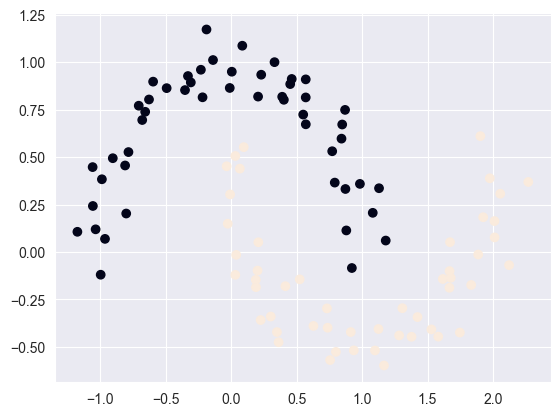

In [20]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:, 0], X[:, 1], c=y)

Далее вы попробуете разные кластеризации для поиска кластеров. Также замеряйте время работы каждого метода.

Попробуйте найти кластеры при помощи KMeans

In [24]:
%%time
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
kmeans.predict(X)

CPU times: total: 0 ns
Wall time: 7 ms


array([0, 1, 3, 2, 2, 2, 1, 3, 1, 3, 1, 1, 3, 2, 0, 3, 3, 3, 1, 1, 4, 0,
       1, 2, 4, 1, 2, 0, 1, 3, 1, 2, 0, 1, 0, 3, 4, 4, 2, 1, 2, 2, 3, 0,
       1, 1, 0, 1, 4, 1, 1, 3, 1, 2, 1, 3, 3, 4, 2, 0, 4, 0, 1, 2, 1, 3,
       2, 3, 4, 0, 3, 2, 4, 2, 0, 4, 3, 2, 0, 4, 4, 0, 2, 1, 3, 4, 1, 3,
       1, 0, 0, 3, 0, 3, 1, 4, 3, 1, 0, 1])

## Quiz

Подберите $\varepsilon$ и min_samples в DBSCAN, чтобы наилучшим образом найти кластеры.
Ищите гиперпараметры из диапазонов:
* eps in [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
* min_samples in [4, 5, 6, 7]

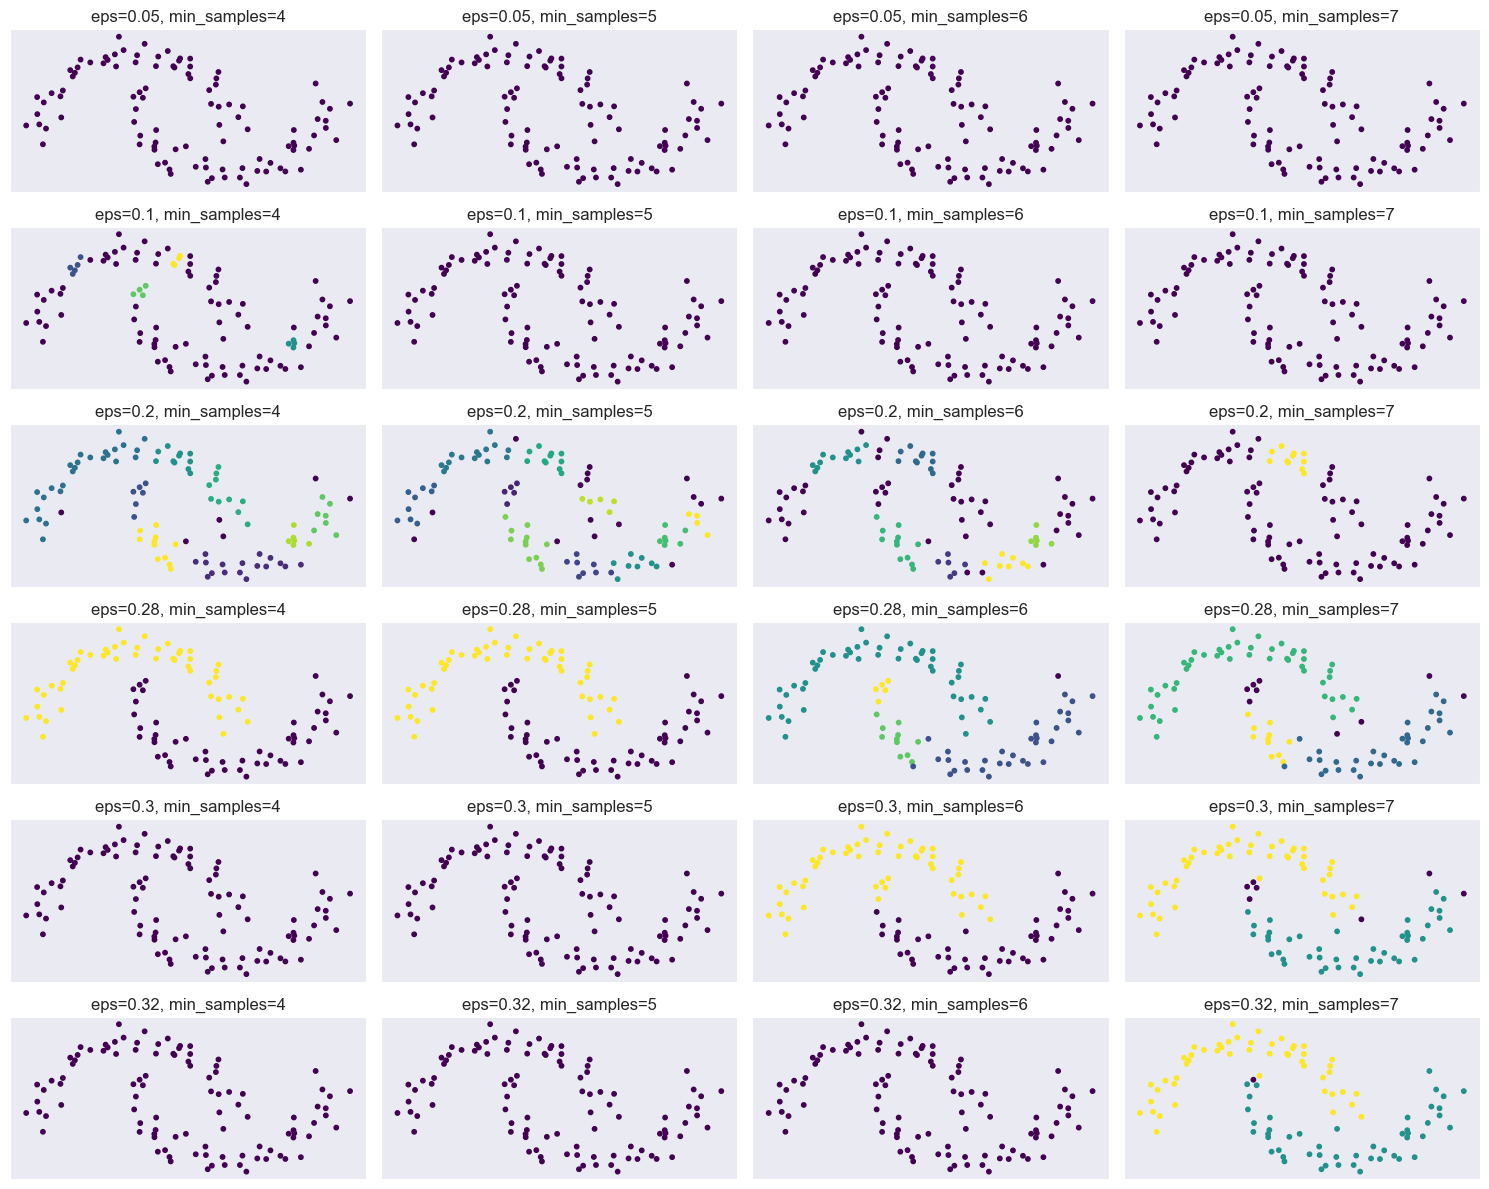

In [31]:
from sklearn.cluster import DBSCAN

eps_values = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
min_samples_values = [4, 5, 6, 7]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(15, 12))

for i, eps in enumerate(eps_values):
    for j, min_sample in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample).fit(X)

        ax = axes[i, j]
        scatter = ax.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis', s=10)
        ax.set_title(f"eps={eps}, min_samples={min_sample}")
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

## Quiz

Используйте иерархическую кластеризацию для поиска кластеров.
Задайте в методе 2 кластера. Подберите гиперпараметр linkage из списка ['ward', 'complete', 'average', 'single'], дающий наилучший результат.

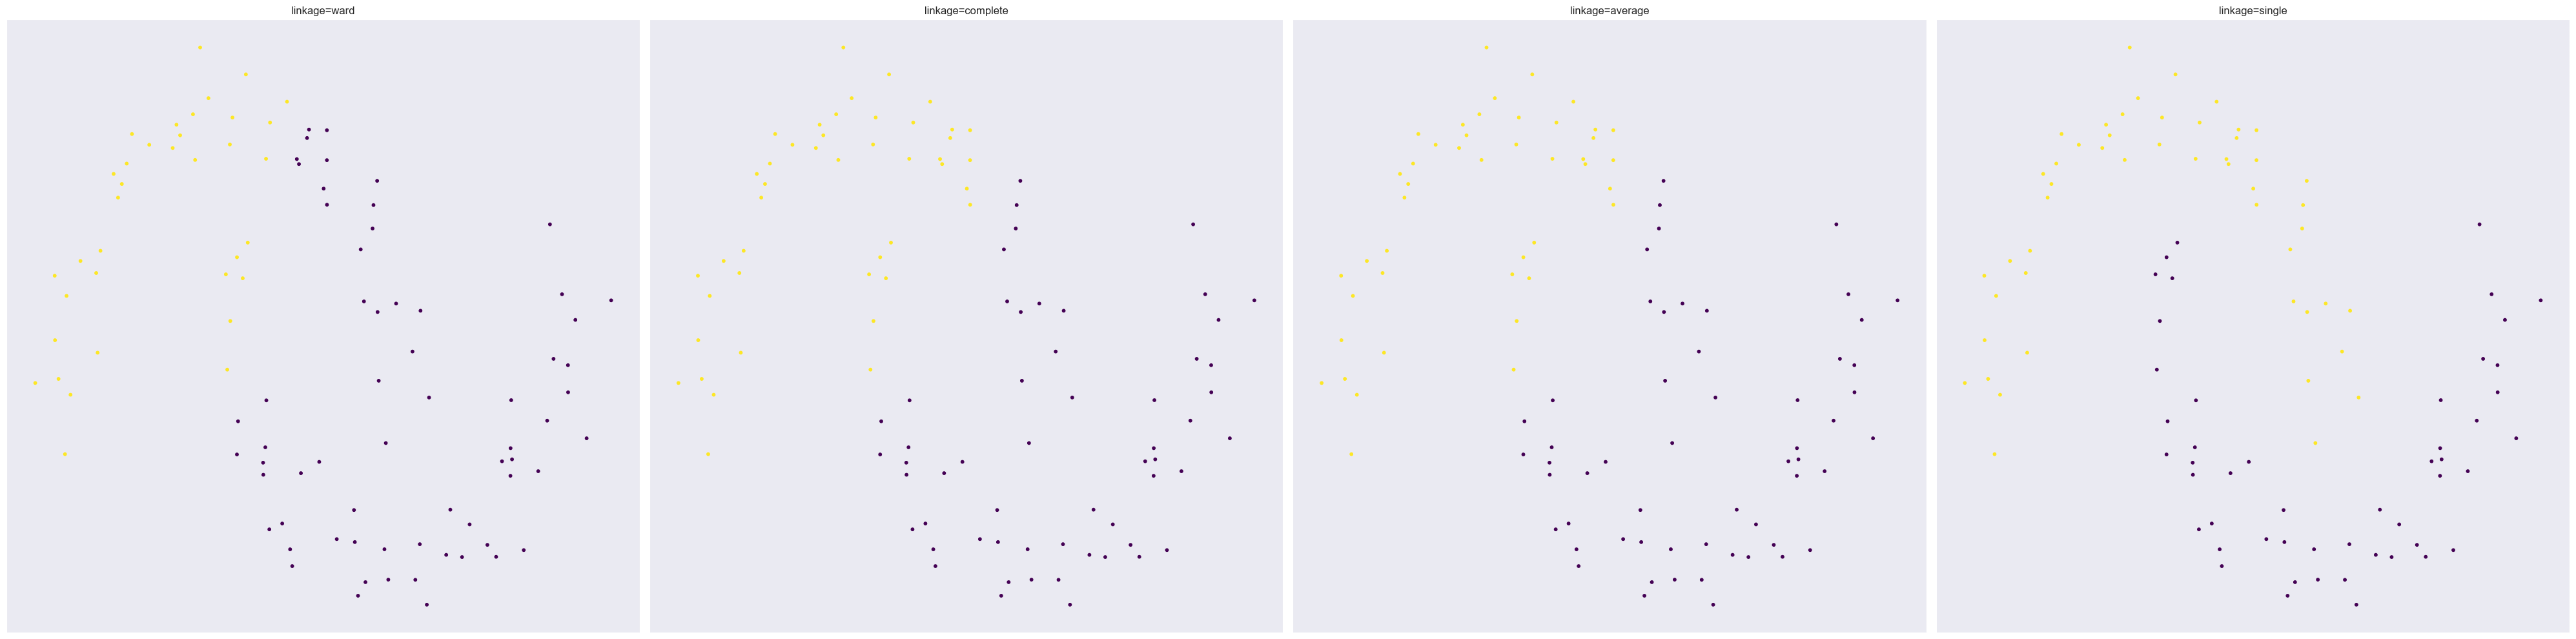

In [37]:
from sklearn.cluster import AgglomerativeClustering

linkages = ['ward', 'complete', 'average', 'single']

fig, axes = plt.subplots(1, len(linkages), figsize=(40, 10))

for i, linkage in enumerate(linkages):
    agg = AgglomerativeClustering(n_clusters=2, linkage=linkage).fit(X)
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap='viridis', s=10)
    ax.set_title(f"linkage={linkage}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Quiz

Попробуйте найти кластеры при помощи спектральной кластеризации.
Задайте 2 кластера, affinity='nearest_neighbors', random_state=42. Подберите гиперпараметр n_neighbors из диапазона [1,2,...,19], чтобы добиться наилучшего результата.

C:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
C:\Users\Gulfik\Desktop\petprojects\hseContest\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


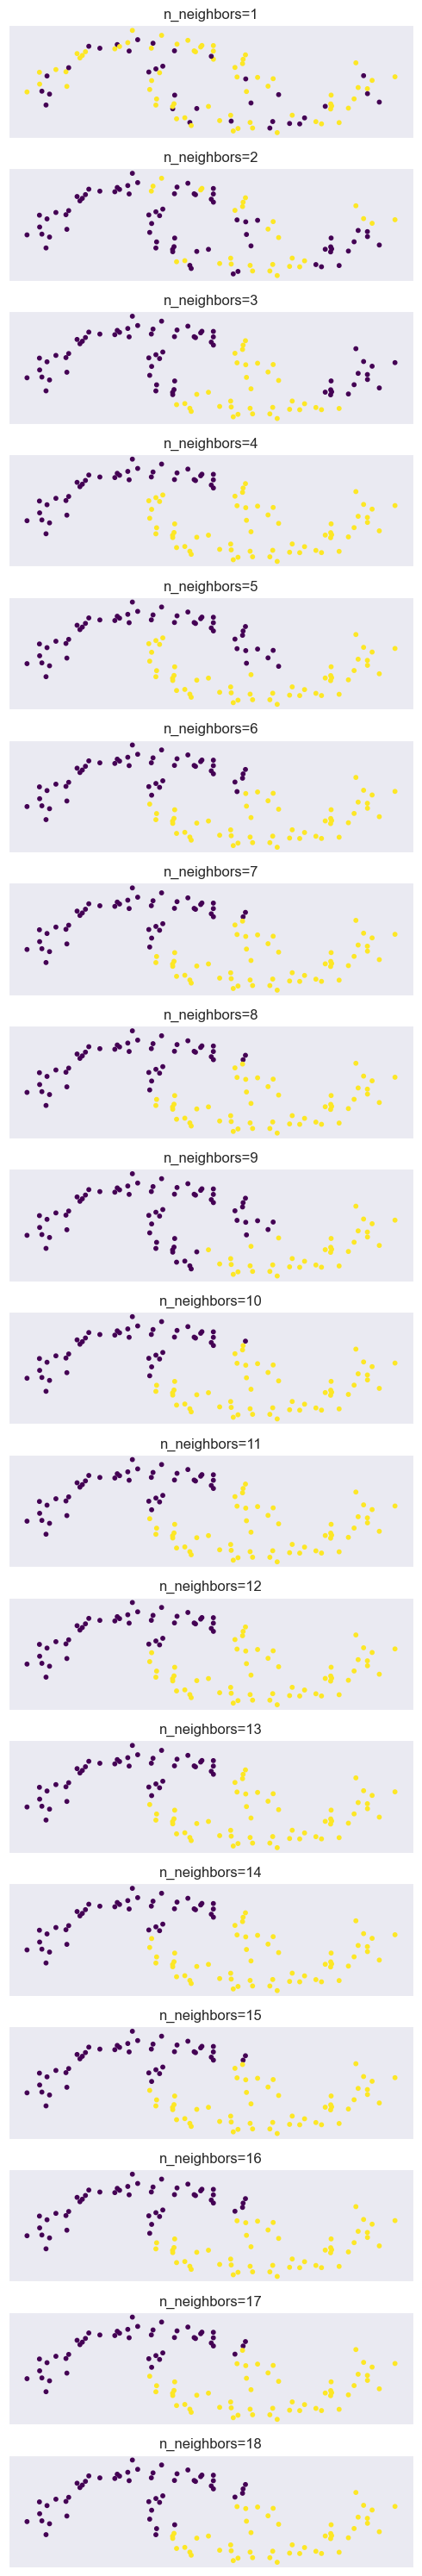

In [42]:
from sklearn.cluster import SpectralClustering

n_neighbors = np.arange(1, 19, 1)
fig, axes = plt.subplots(len(n_neighbors), 1, figsize=(5, 30))

for i, n_neighbor in enumerate(n_neighbors):
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42,
                                  n_neighbors=n_neighbor).fit(X)
    ax = axes[i]
    scatter = ax.scatter(X[:, 0], X[:, 1], c=spectral.labels_, cmap='viridis', s=10)
    ax.set_title(f"n_neighbors={n_neighbor}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Quiz

Сделайте выводы: какой метод сработал лучше других? какой метод сработал быстрее? есть ли метод, наилучший и по качеству, и по времени одновременно?